<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px"></p>

# Create your first crypto trading strategy

### Summary
* Manage the data
* Support & Resistance
* Strategy
* Graph
* Compute the profit
* Automatization
* Test other cryptocurrencies

<br>


💰Join our community: https://discord.gg/wXjNPAc5BH

📚Read our book: https://www.amazon.com/gp/product/B09HG18CYL 

🖥️Quantreo's YouTube channel: https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# Manage the data


In [ ]:
# Import brut data
df = pd.read_csv("BTCUSD_D1.csv")
df

,<DATE>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0,2013.01.12\t14.260\t14.340\t13.980\t14.240\t26...
1,2013.01.13\t14.240\t14.320\t13.950\t14.120\t44...
2,2013.01.14\t14.190\t14.350\t14.110\t14.300\t22...
3,2013.01.15\t14.350\t14.480\t13.990\t14.250\t51...
4,2013.01.16\t14.300\t14.730\t14.210\t14.730\t45...
...,...
2835,2022.01.05\t46210.334\t47056.482\t43456.663\t4...
2836,2022.01.06\t43594.098\t43775.633\t42423.391\t4...
2837,2022.01.07\t43109.849\t43230.589\t40619.650\t4...
2838,2022.01.10\t42289.425\t42483.756\t39652.164\t4...


In [ ]:
# Add the delimiter
df = pd.read_csv("BTCUSD_D1.csv", delimiter="\t")
df

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2013.01.12,14.260,14.340,13.980,14.240,26930,0,0
1,2013.01.13,14.240,14.320,13.950,14.120,44331,0,0
2,2013.01.14,14.190,14.350,14.110,14.300,22094,0,0
3,2013.01.15,14.350,14.480,13.990,14.250,51570,0,0
4,2013.01.16,14.300,14.730,14.210,14.730,45534,0,0
...,...,...,...,...,...,...,...,...
2835,2022.01.05,46210.334,47056.482,43456.663,43597.237,67209,0,4347
2836,2022.01.06,43594.098,43775.633,42423.391,43109.849,74388,0,4244
2837,2022.01.07,43109.849,43230.589,40619.650,41870.029,86973,0,4062
2838,2022.01.10,42289.425,42483.756,39652.164,41711.069,96717,0,3966


In [ ]:
# Preprocessing function

def preprocessing(name):

  # Import the data
  df = pd.read_csv(f"{name}", delimiter="\t", index_col="<DATE>", parse_dates=True)

  # Delete the two last columns
  df = df.iloc[:,:-2]

  # Rename
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "name"

  return df

In [ ]:
df = preprocessing("BTCUSD_D1.csv")
df

,open,high,low,close,volume
name,,,,,
2013-01-12,14.260,14.340,13.980,14.240,26930
2013-01-13,14.240,14.320,13.950,14.120,44331
2013-01-14,14.190,14.350,14.110,14.300,22094
2013-01-15,14.350,14.480,13.990,14.250,51570
2013-01-16,14.300,14.730,14.210,14.730,45534
...,...,...,...,...,...
2022-01-05,46210.334,47056.482,43456.663,43597.237,67209
2022-01-06,43594.098,43775.633,42423.391,43109.849,74388
2022-01-07,43109.849,43230.589,40619.650,41870.029,86973


# Support & Resistance

In [ ]:
# Create Resistance using a rolling max
df["resistance"] = df["close"].rolling(30).max().shift(3)


# Create Support using a rolling min
df["support"] = df["close"].rolling(30).min().shift(3)

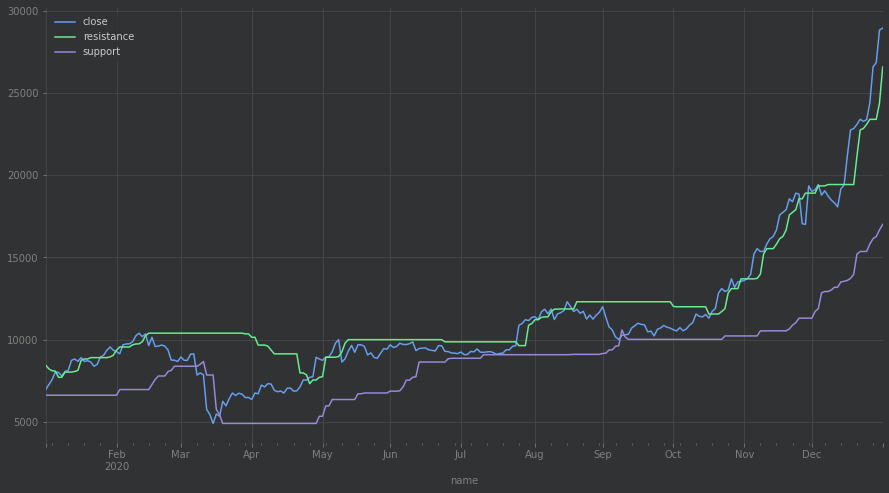

In [ ]:
# Plot the results
df[["close", "resistance", "support"]].loc["2020"].plot(figsize=(15,8))

# Strategy

<p><img alt="Colaboratory logo" src="https://www.quantreo.com/wp-content/uploads/2022/01/Capture-decran-2022-01-12-a-15.42.45.png" align="center"  vspace="0px"></p>

In [ ]:
# Safety distance
distance = 0.5/100

# Shift the values
df["close yersteday"] = df["close"].shift(1)
df["resistance yersteday"] = df["resistance"].shift(1)
df["signal_long"] = np.nan


# Create the condition
df.loc[(df["close yersteday"] < df["resistance yersteday"]) & \
       (df["close"] > df["resistance"]*(1+distance)), "signal_long"] = 1


In [ ]:
df["signal_long"] = df["signal_long"].fillna(value=0)

# Verification Graph

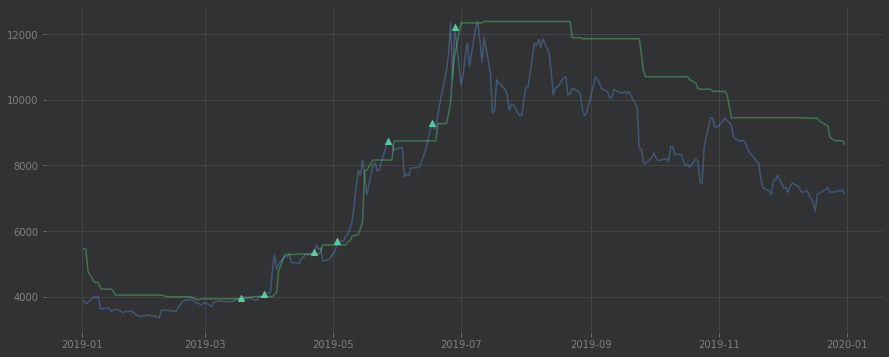

In [ ]:
# We plot all the signla to be sure that they be correct

year="2019"

# Select all signal in a index list to plot only this points
idx_open = df.loc[df["signal_long"] == 1].loc[year].index


# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the open long signal in green
plt.scatter(idx_open, df.loc[idx_open]["close"].loc[year], color= "#57CE95", marker="^")


# Plot the resistance to be sure that the conditions are completed
plt.plot(df["close"].loc[year].index, df["close"].loc[year], alpha=0.35)

plt.plot(df["close"].loc[year].index, df["resistance"].loc[year], alpha=0.35)


# Show the graph
plt.show()

# Compute the profit

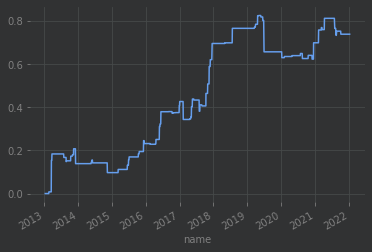

In [ ]:
# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = df["pct"] * (df["signal_long"].shift(1))

df["return"].cumsum().plot()

# Automatization

In [ ]:
def preprocessing(name):

  # Import the data
  df = pd.read_csv(f"{name}", delimiter="\t", index_col="<DATE>", parse_dates=True)

  # Delete the two last columns
  df = df.iloc[:,:-2]

  # Rename
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "name"

  return df
def breakout(df, cost=0.001, duration=7):
  df["resistance"] = df["close"].rolling(30).max().shift(3)
  df["support"] = df["close"].rolling(30).min().shift(3)

  distance = 0.5/100

  # Shift the values
  df["Close Yesterday"] = df["close"].shift(1)
  df["Resistance Yesterday"] = df["resistance"].shift(1)
  df["signal_long"] = np.nan

  df.loc[(df["close"] > df["resistance"]*(1+distance)) &\
         (df["Close Yesterday"] < df["Resistance Yesterday"]), "signal_long"] = 1

  df["signal_long"] = df["signal_long"].fillna(value=0)

  # Compute the percentage of variation of the asset
  df["pct"] = df["close"].pct_change(1)

  # Compute the return of the strategy

  df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal_long"].shift(duration))
  # df["return"] = (df["pct"] + df["pct"].shift(9) + df["pct"].shift(8) + df["pct"].shift(7) + df["pct"].shift(6)\
  #                 + df["pct"].shift(5)+ df["pct"].shift(4)+ df["pct"].shift(3)+ df["pct"].shift(2)\
  #                 + df["pct"].shift(1)) * (df["signal_long"].shift(10))
  
  df.loc[df["signal_long"]==1,"return"]=df["return"]-cost

  return df["return"]

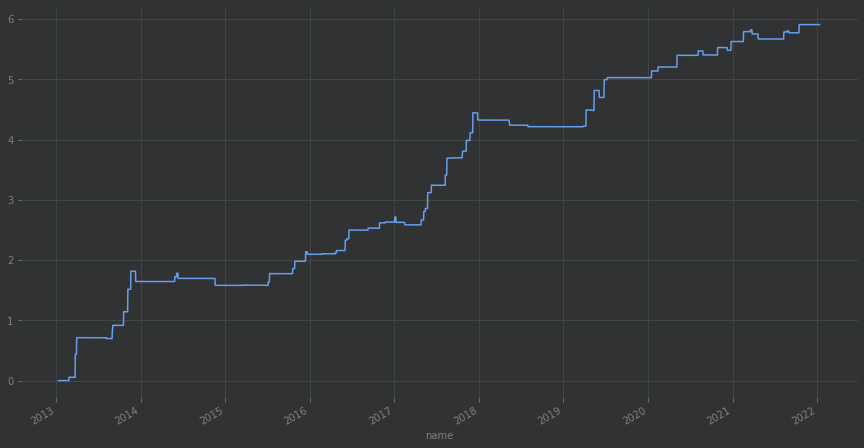

In [ ]:
breakout(df, duration=7).fillna(value=0).cumsum().plot(figsize=(15,8))

# Test other cryptocurrencies

In [ ]:
# Create empty dataframe
dft = pd.DataFrame()

namelist = ["BTC", "ETH", "LTC", "XMR", "ETC"]

for name in namelist:
  # Manage the data
  df = preprocessing(f"{name}USD_D1.csv")

  # Create the strategy
  dfc = breakout(df, duration=7)

  # Rename return
  dfc.rename = name

  # drop the nan
  dft[name] = dfc.fillna(value=0)

BackTest(dfc.fillna(value=0), 52)

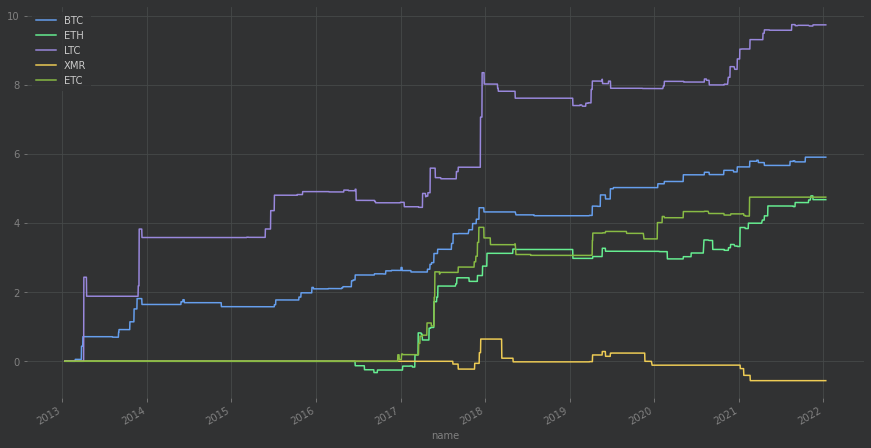

In [ ]:
dft.fillna(value=0).cumsum(axis=0).plot(figsize=(15,8))

# How to optimize this strategy:
* Optimize the parameters of the strategy (Safety distance, rolling period for the resistance, etc...)
* Optimize the order duration (confer my other course with a Ethereum strategy example (Statistic and probability for quantitative finance)
* Combine this strategy with another strategy